<a href="https://colab.research.google.com/github/sainath5466/asdf/blob/main/ML_FA2_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import os
import pandas as pd

# Define paths for the zip file and extraction directory
zip_path = 'archive.zip'
extract_path = 'extracted_data'

# Create extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract files from the zip archive
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Locate CSV files inside the extracted folder
csv_files = [os.path.join(root, file)
             for root, dirs, files in os.walk(extract_path)
             for file in files if file.endswith('.csv')]

if not csv_files:
    raise ValueError("No CSV files found in the archive!")

# Load the first CSV file found
data_file = csv_files[0]
df = pd.read_csv(data_file)

# 1. Check for missing values
missing_counts = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_counts)

# 2. Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")

# 3. Check data types and overall info
print("\nDataset Information:")
print(df.info())

# 4. Quick preview of the data
print("\nDataset Preview:")
print(df.head())


Missing Values in Each Column:
seller_type        0
bedroom            0
layout_type        0
property_type      0
locality           0
price              0
area               0
furnish_type       0
bathroom         171
dtype: int64

Number of Duplicate Rows: 8247

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22800 non-null  object
 1   bedroom        22800 non-null  int64 
 2   layout_type    22800 non-null  object
 3   property_type  22800 non-null  object
 4   locality       22800 non-null  object
 5   price          22800 non-null  object
 6   area           22800 non-null  int64 
 7   furnish_type   22800 non-null  object
 8   bathroom       22629 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB
None

Dataset Preview:
  seller_type  bedroom layout_type      property_type  loca

In [3]:
# Importing necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import xgboost as xgb
# from catboost import CatBoostRegressor

# Load the dataset
file_path = 'Pune_rent.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Data cleaning and preprocessing
data['price'] = data['price'].replace({',': ''}, regex=True)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

data['bathroom'] = pd.to_numeric(data['bathroom'], errors='coerce')
data['bathroom'] = data['bathroom'].fillna(data['bathroom'].median())

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Encoding categorical variables using LabelEncoder
categorical_cols = ['seller_type', 'layout_type', 'property_type', 'locality', 'furnish_type']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Update: Fix the numerical columns excluding 'price'
numerical_cols = numerical_cols.drop('price')

# Separate features (X) and target variable (y)
X = data[categorical_cols + list(numerical_cols)]  # Corrected feature list
y = data['price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for numerical columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Now you can proceed with the individual models.

In [4]:
# Train Support Vector Regression Model
model = SVR()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("Support Vector Regression Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Support Vector Regression Model Evaluation:
R²: -0.06036225352275926
Mean Absolute Error: 7629.630020433971
Mean Squared Error: 156038611.95936117
Root Mean Squared Error: 12491.54161660446


Linear Regression Model Evaluation:
R²: 0.4712477596166804
Mean Absolute Error: 5039.508064724084
Mean Squared Error: 77809036.85105082
Root Mean Squared Error: 8820.94308172606


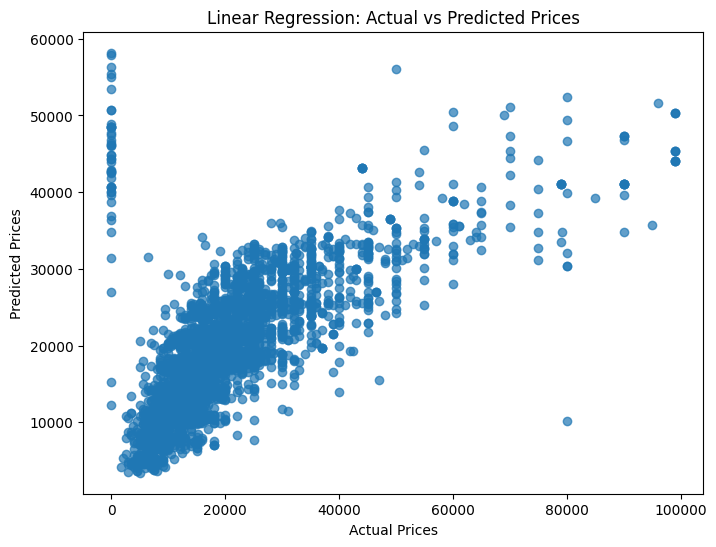

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()


Random Forest Model Evaluation:
R²: 0.7717510702195549
Mean Absolute Error: 2764.2768292552014
Mean Squared Error: 33588187.495195396
Root Mean Squared Error: 5795.531683564105


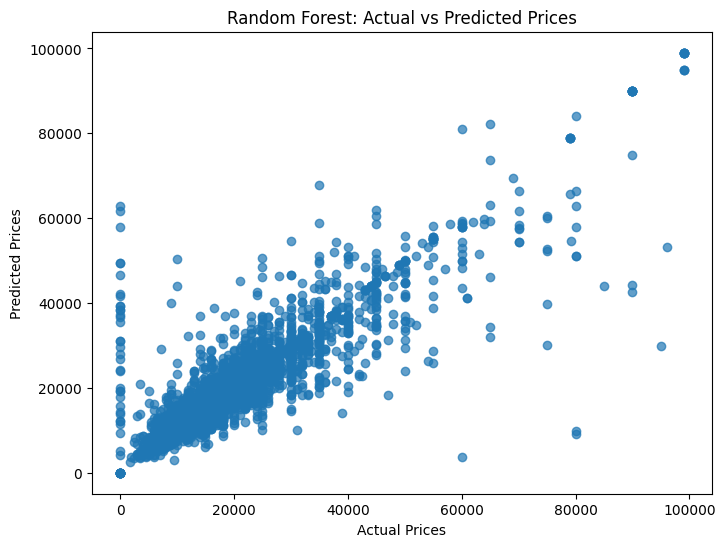

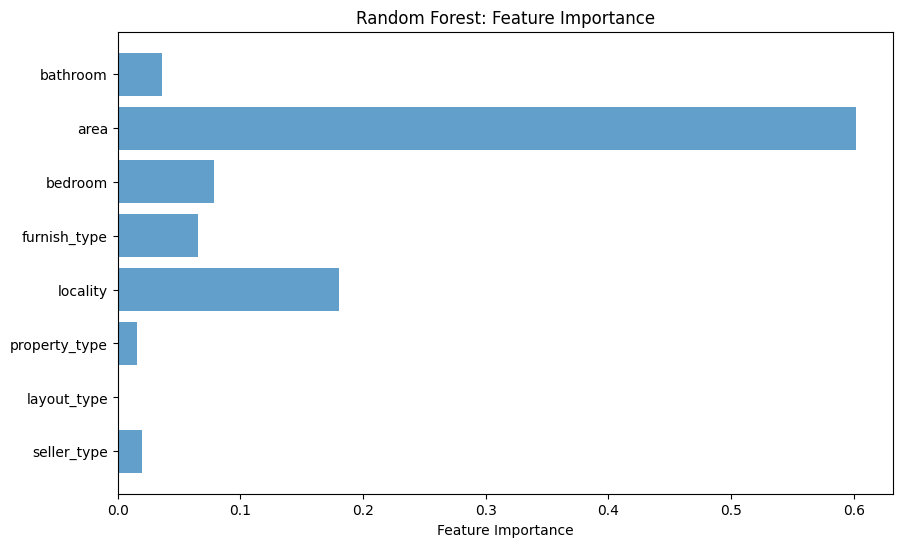

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("Random Forest Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Feature Importance Plot
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('Random Forest: Feature Importance')
plt.show()


In [7]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Load the dataset
file_path = '/content/Pune_rent.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Data cleaning and preprocessing
data['price'] = data['price'].replace({',': ''}, regex=True)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

data['bathroom'] = pd.to_numeric(data['bathroom'], errors='coerce')
data['bathroom'] = data['bathroom'].fillna(data['bathroom'].median())

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Encoding categorical variables using LabelEncoder
categorical_cols = ['seller_type', 'layout_type', 'property_type', 'locality', 'furnish_type']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Update: Fix the numerical columns excluding 'price'
numerical_cols = numerical_cols.drop('price')

# Separate features (X) and target variable (y)
X = data[categorical_cols + list(numerical_cols)]  # Corrected feature list
y = data['price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for numerical columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# The data is now preprocessed and ready for model training.

XGBoost Model Evaluation:
R²: 0.7628099273633878
Mean Absolute Error: 3032.7963408452083
Mean Squared Error: 34903929.842654124
Root Mean Squared Error: 5907.954793552006


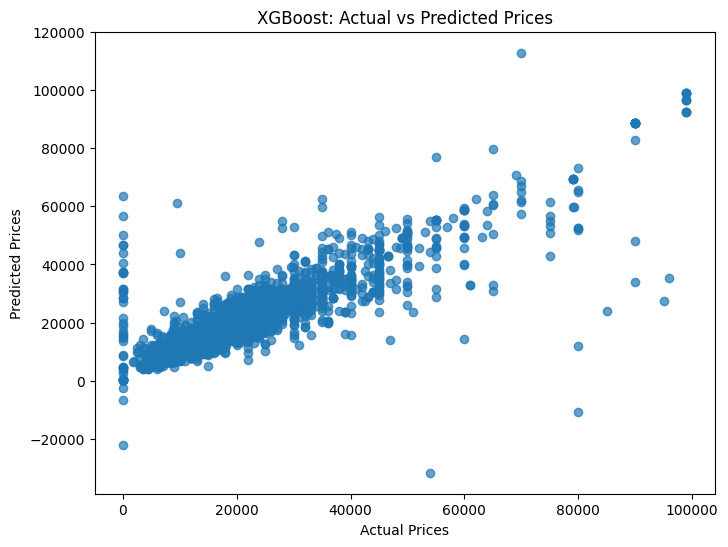

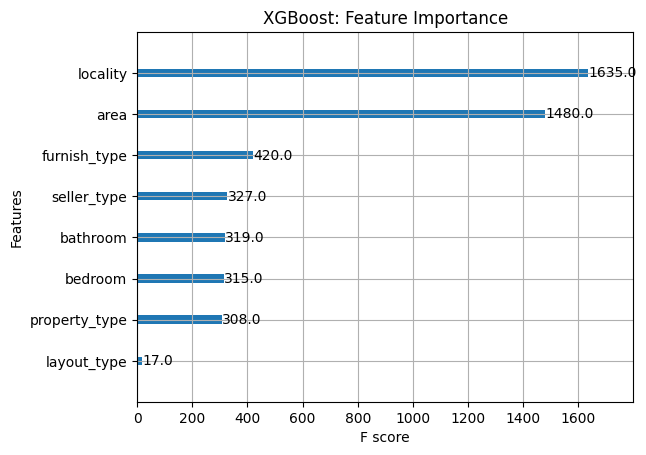

In [8]:
import xgboost as xgb

# Train XGBoost Model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("XGBoost Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('XGBoost: Actual vs Predicted Prices')
plt.show()

# Feature Importance Plot
xgb.plot_importance(model, importance_type='weight')
plt.title('XGBoost: Feature Importance')
plt.show()


CatBoost Model Evaluation:
R²: 0.7388737229908782
Mean Absolute Error: 3319.2380634184665
Mean Squared Error: 38426284.67323545
Root Mean Squared Error: 6198.8938265819215


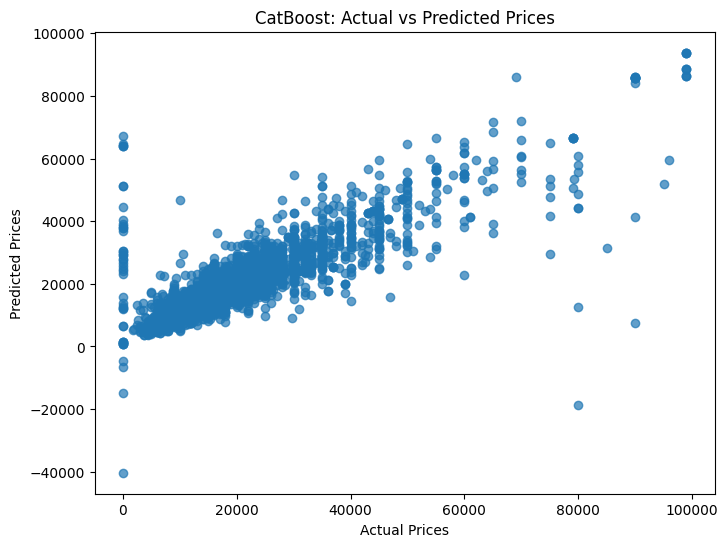

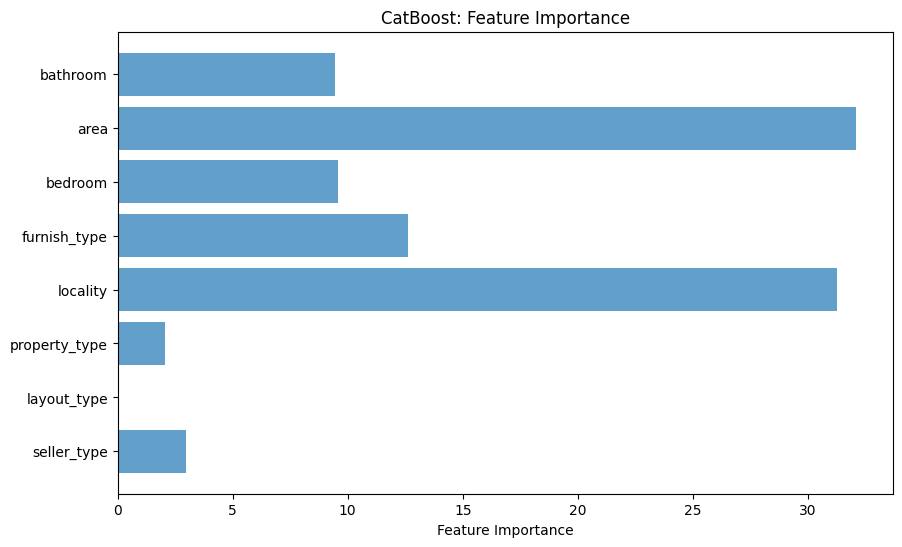

In [9]:
from catboost import CatBoostRegressor

# Train CatBoost Model
model = CatBoostRegressor(n_estimators=100, random_state=42, silent=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("CatBoost Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('CatBoost: Actual vs Predicted Prices')
plt.show()

# Feature Importance Plot
feature_importance = model.get_feature_importance()
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('CatBoost: Feature Importance')
plt.show()


In [10]:
!pip install --upgrade numpy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [11]:
!pip install --upgrade catboost

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [12]:
!pip install --upgrade numpy
!pip install --upgrade catboost

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
 

CatBoost Model Evaluation:
R²: 0.7388737229908782
Mean Absolute Error: 3319.2380634184665
Mean Squared Error: 38426284.67323545
Root Mean Squared Error: 6198.8938265819215


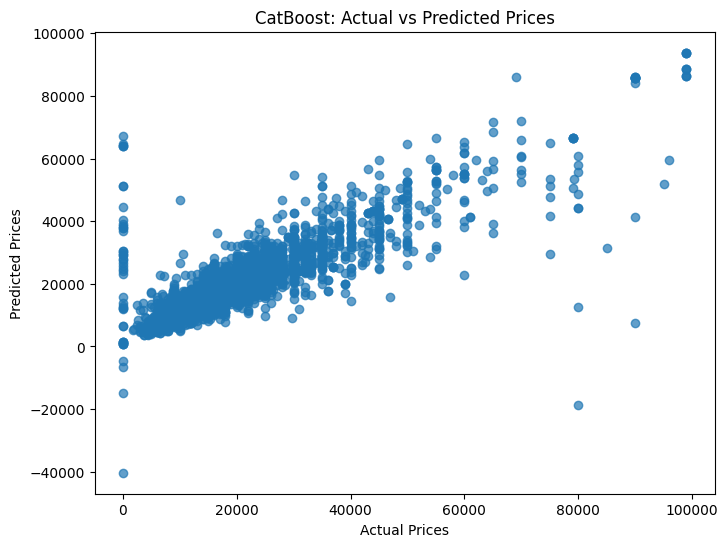

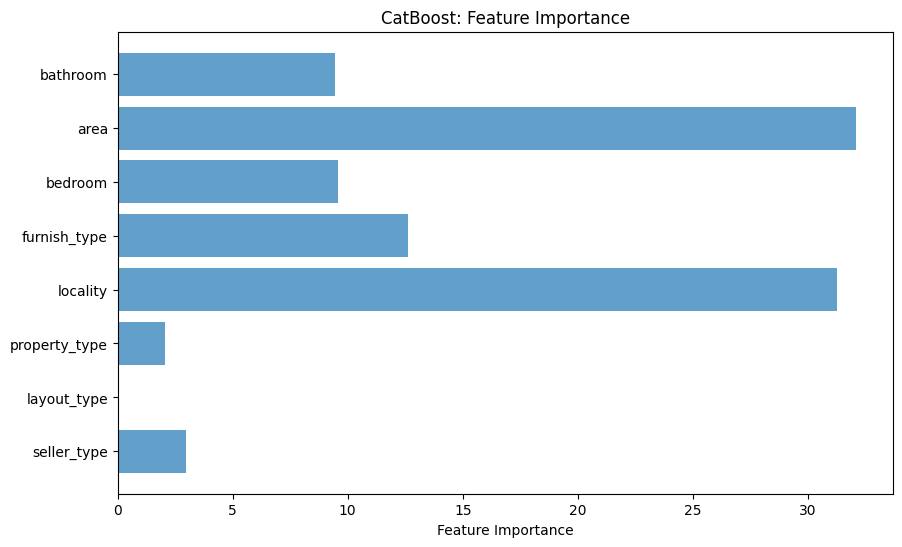

In [13]:
from catboost import CatBoostRegressor

# Train CatBoost Model
model = CatBoostRegressor(n_estimators=100, random_state=42, silent=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("CatBoost Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('CatBoost: Actual vs Predicted Prices')
plt.show()

# Feature Importance Plot
feature_importance = model.get_feature_importance()
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('CatBoost: Feature Importance')
plt.show()


In [14]:
pip install numpy==1.21.6


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [15]:
!pip install numpy==1.21.6


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

CatBoost Model Evaluation:
R²: 0.7388737229908782
Mean Absolute Error: 3319.2380634184665
Mean Squared Error: 38426284.67323545
Root Mean Squared Error: 6198.8938265819215


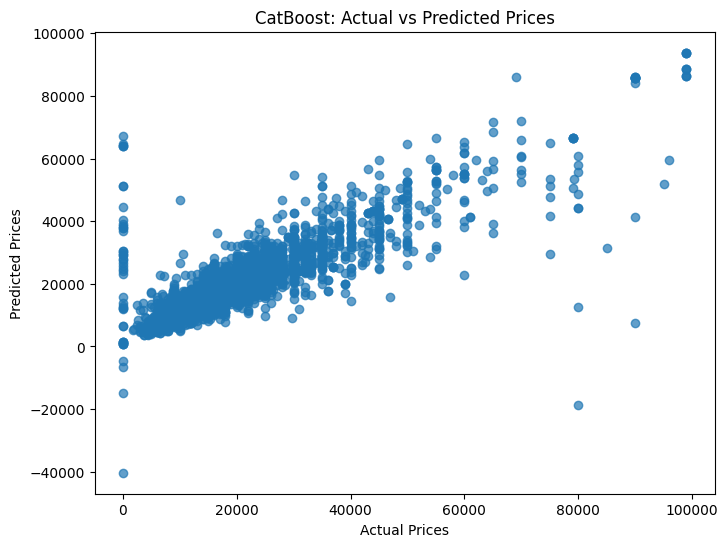

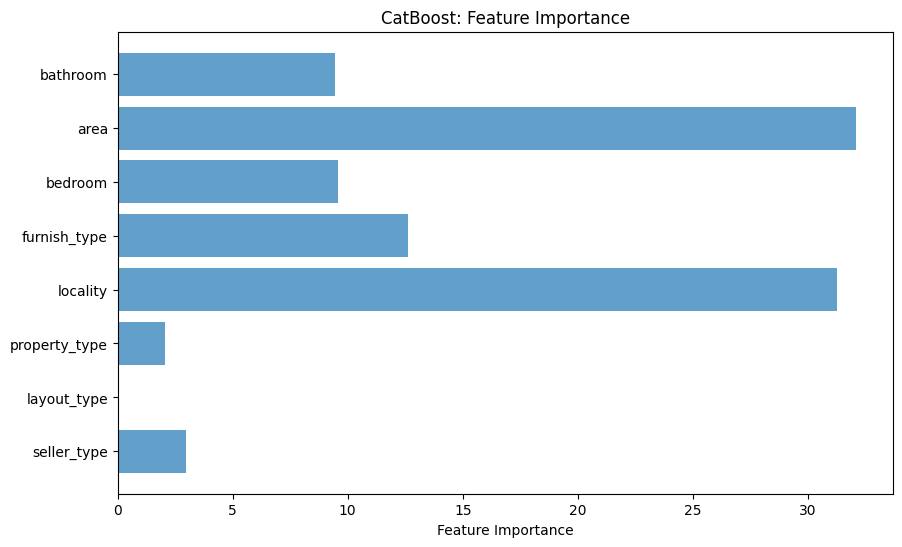

In [16]:
# Ensure that you have installed compatible versions of numpy and catboost first:
# !pip install --upgrade numpy catboost
# or
# !pip install numpy==1.21.6 catboost

import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Example: assuming you already have X_train, y_train, X_test, y_test, and X (features DataFrame)
# If these variables are not defined, make sure to load your data and split accordingly.

# Train CatBoost Model
model = CatBoostRegressor(n_estimators=100, random_state=42, silent=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("CatBoost Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('CatBoost: Actual vs Predicted Prices')
plt.show()

# Feature Importance Plot
feature_importance = model.get_feature_importance()
features = X.columns  # Assumes that X is a DataFrame containing your features

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('CatBoost: Feature Importance')
plt.show()


In [17]:
!pip install numpy==1.21.6
!pip install --upgrade catboost

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

CatBoost Model Evaluation:
R²: 0.7388737229908782
Mean Absolute Error: 3319.2380634184665
Mean Squared Error: 38426284.67323545
Root Mean Squared Error: 6198.8938265819215


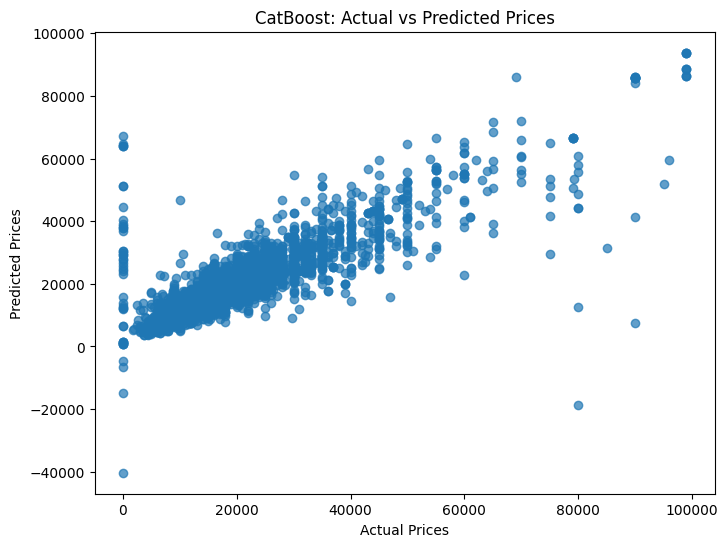

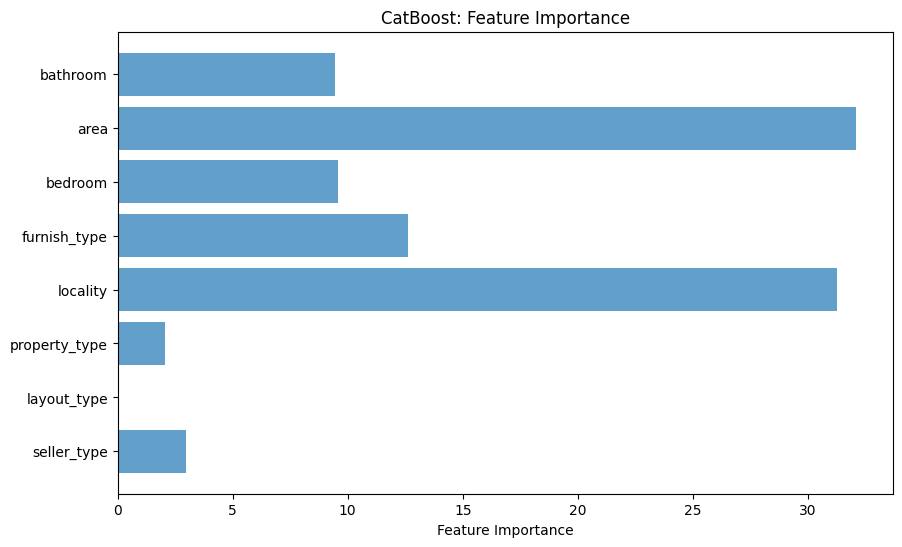

In [18]:
# Ensure that you have installed compatible versions of numpy and catboost first:
# !pip install --upgrade numpy catboost
# or
# !pip install numpy==1.21.6 catboost

import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Example: assuming you already have X_train, y_train, X_test, y_test, and X (features DataFrame)
# If these variables are not defined, make sure to load your data and split accordingly.

# Train CatBoost Model
model = CatBoostRegressor(n_estimators=100, random_state=42, silent=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("CatBoost Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('CatBoost: Actual vs Predicted Prices')
plt.show()

# Feature Importance Plot
feature_importance = model.get_feature_importance()
features = X.columns  # Assumes that X is a DataFrame containing your features

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('CatBoost: Feature Importance')
plt.show()


CatBoost Model Evaluation:
R²: 0.7388737229908782
Mean Absolute Error: 3319.2380634184665
Mean Squared Error: 38426284.67323545
Root Mean Squared Error: 6198.8938265819215


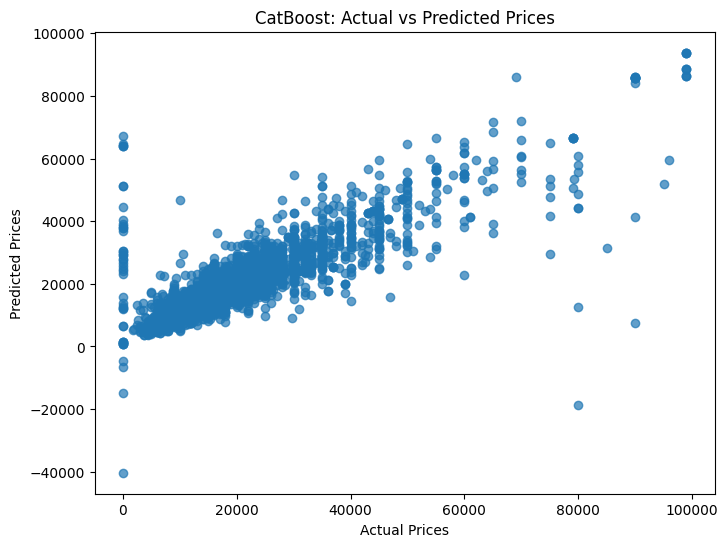

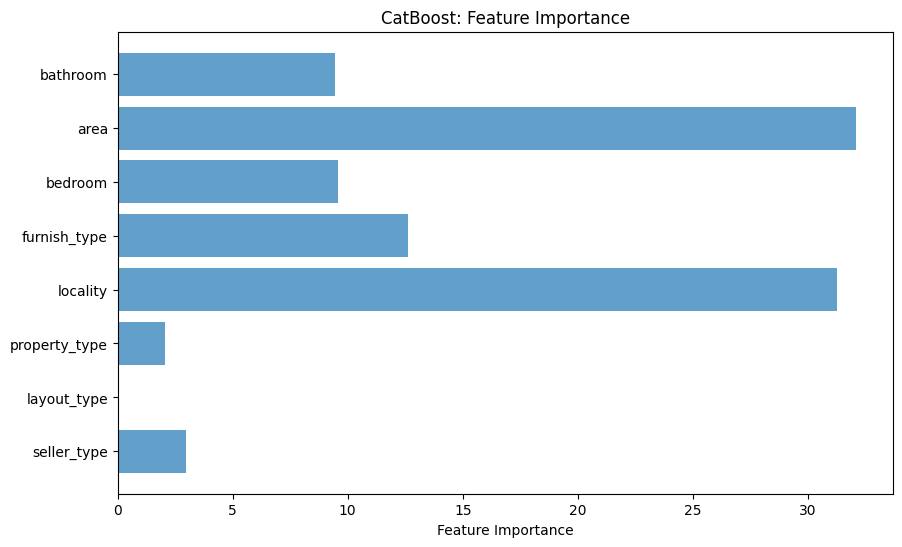

In [19]:
from catboost import CatBoostRegressor

# Train CatBoost Model
model = CatBoostRegressor(n_estimators=100, random_state=42, silent=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("CatBoost Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('CatBoost: Actual vs Predicted Prices')
plt.show()

# Feature Importance Plot
feature_importance = model.get_feature_importance()
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('CatBoost: Feature Importance')
plt.show()


CatBoost Model Evaluation:
R²: 0.7388737229908782
Mean Absolute Error: 3319.2380634184665
Mean Squared Error: 38426284.67323545
Root Mean Squared Error: 6198.8938265819215


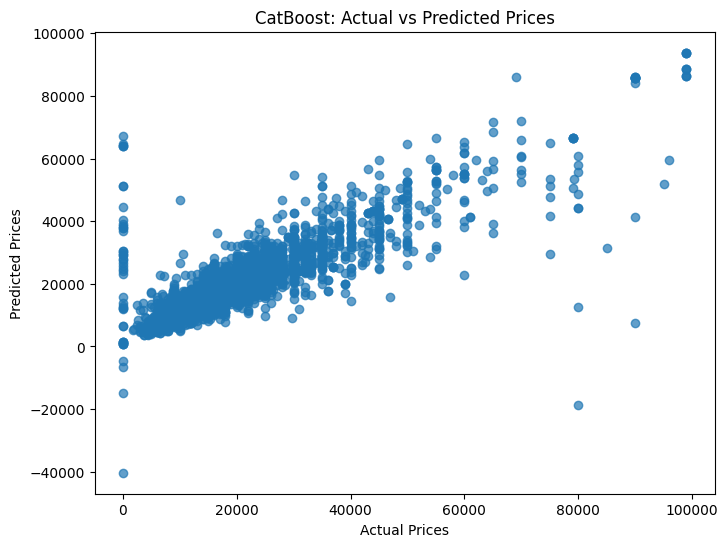

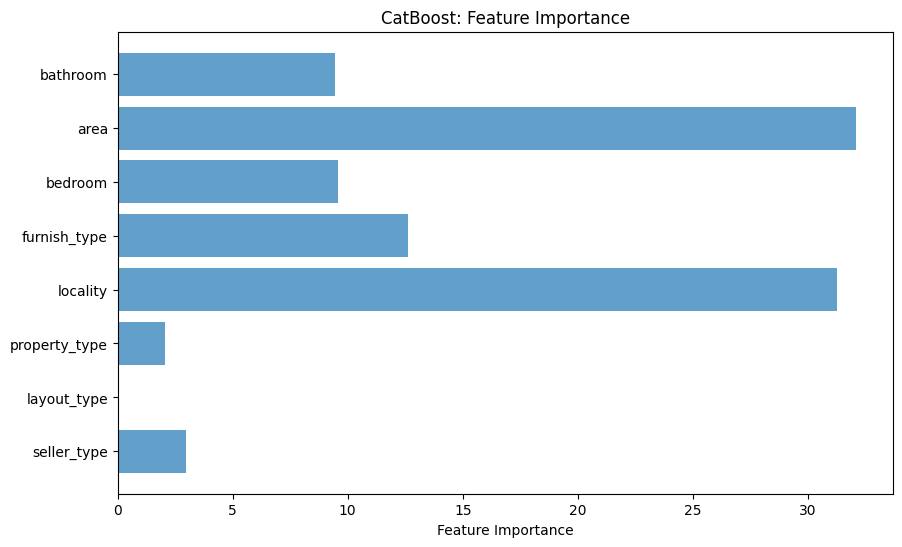

In [20]:
from catboost import CatBoostRegressor

# Train CatBoost Model
model = CatBoostRegressor(n_estimators=100, random_state=42, silent=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("CatBoost Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('CatBoost: Actual vs Predicted Prices')
plt.show()

# Feature Importance Plot
feature_importance = model.get_feature_importance()
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('CatBoost: Feature Importance')
plt.show()


CatBoost Model Evaluation:
R²: 0.7388737229908782
Mean Absolute Error: 3319.2380634184665
Mean Squared Error: 38426284.67323545
Root Mean Squared Error: 6198.8938265819215


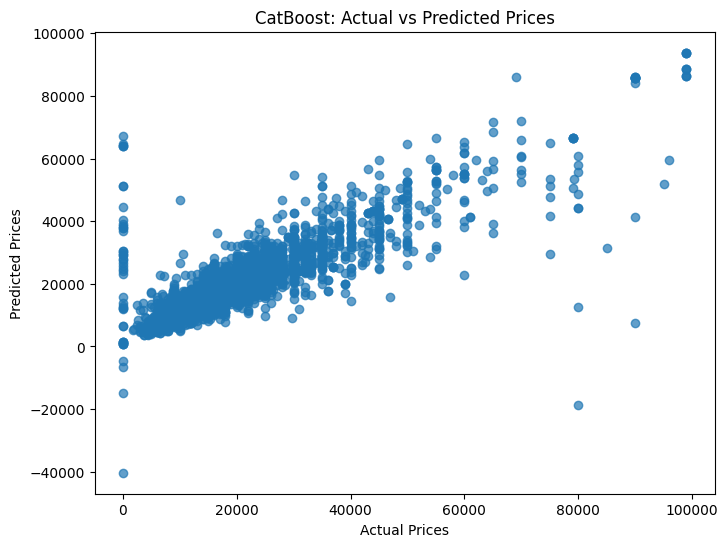

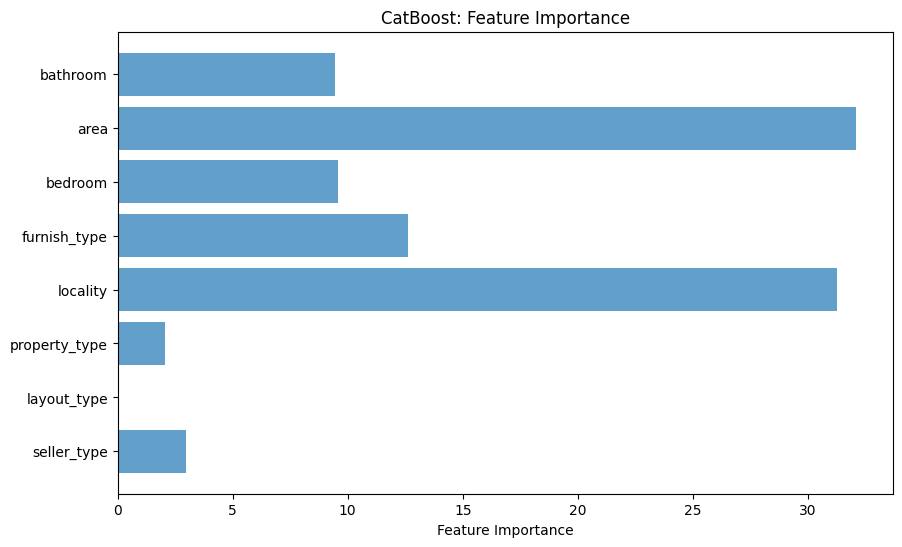

In [21]:
from catboost import CatBoostRegressor

# Train CatBoost Model
model = CatBoostRegressor(n_estimators=100, random_state=42, silent=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("CatBoost Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('CatBoost: Actual vs Predicted Prices')
plt.show()

# Feature Importance Plot
feature_importance = model.get_feature_importance()
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('CatBoost: Feature Importance')
plt.show()


CatBoost Model Evaluation:
R²: 0.7388737229908782
Mean Absolute Error: 3319.2380634184665
Mean Squared Error: 38426284.67323545
Root Mean Squared Error: 6198.8938265819215


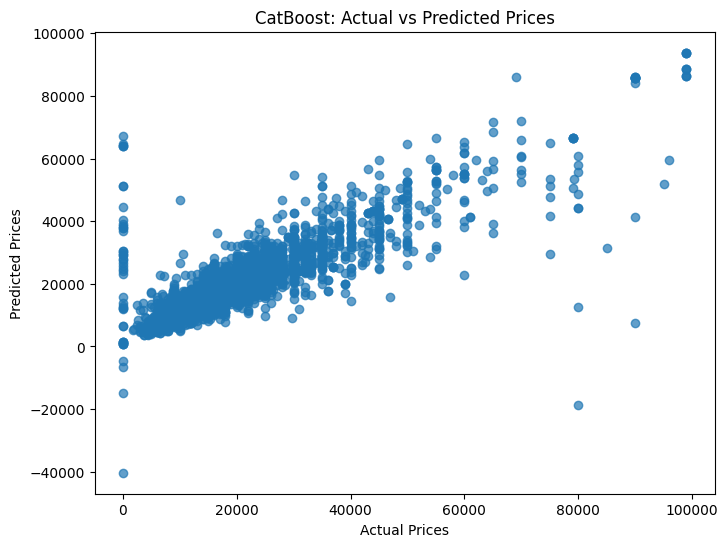

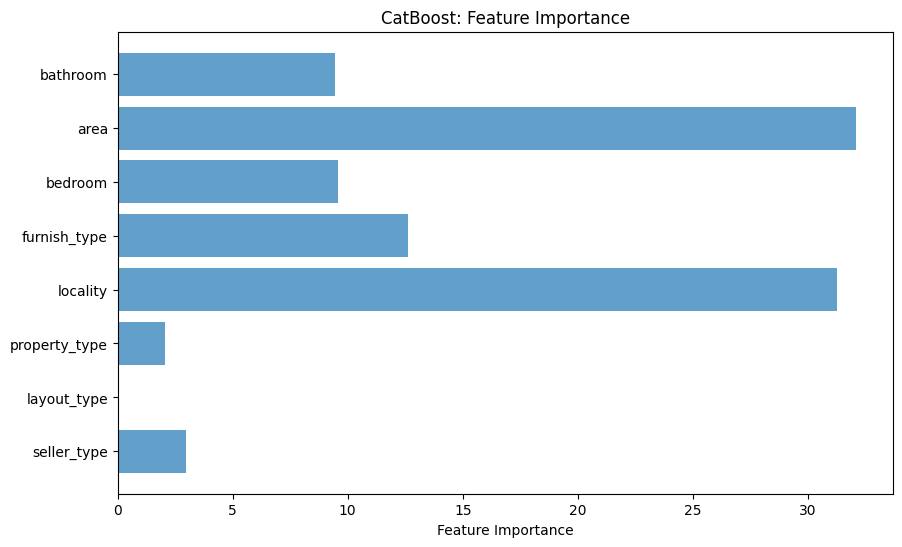

In [22]:
from catboost import CatBoostRegressor

# Train CatBoost Model
model = CatBoostRegressor(n_estimators=100, random_state=42, silent=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("CatBoost Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('CatBoost: Actual vs Predicted Prices')
plt.show()

# Feature Importance Plot
feature_importance = model.get_feature_importance()
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('CatBoost: Feature Importance')
plt.show()


In [23]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Train CatBoost Model
model = CatBoostRegressor(n_estimators=100, random_state=42, silent=True)
model.fit(X_train, y_train)

# ... (rest of your code) ...

In [24]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Train CatBoost Model
model = CatBoostRegressor(n_estimators=100, random_state=42, silent=True)
model.fit(X_train, y_train)

# ... (rest of your code) ...

In [25]:
!pip install numpy==1.21.6
!pip install --upgrade catboost

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [26]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Train CatBoost Model
model = CatBoostRegressor(n_estimators=100, random_state=42, silent=True)
model.fit(X_train, y_train)

# ... (rest of your code) ...


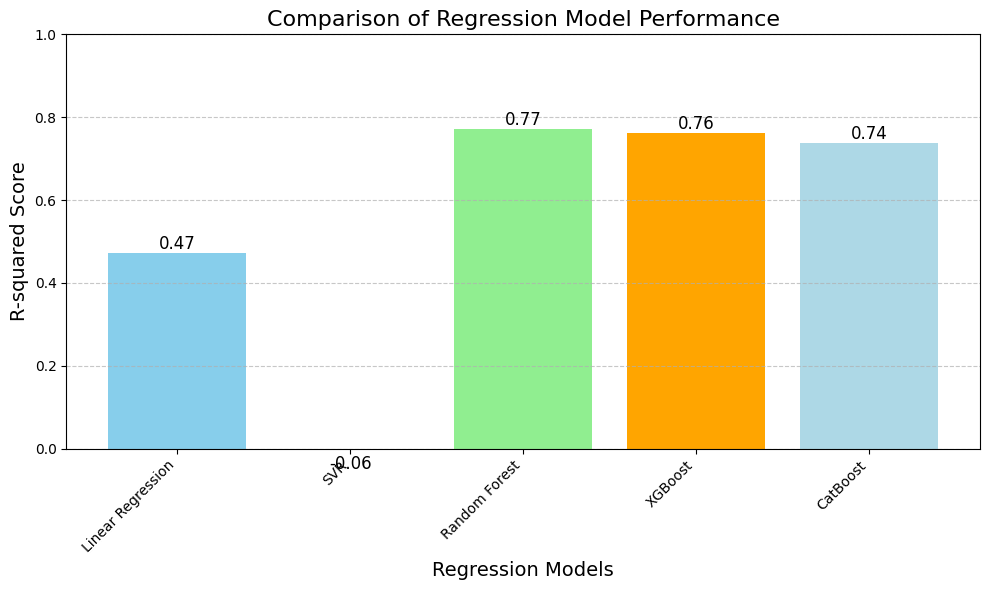

In [29]:
# prompt: give me comparing graph of above all model

import matplotlib.pyplot as plt

# Assuming you have already trained and evaluated your models
# and stored the R-squared values in a list called r2_scores
# with corresponding model names in a list called model_names.

# Example data (replace with your actual results):
model_names = ['Linear Regression', 'SVR', 'Random Forest', 'XGBoost', 'CatBoost']
r2_scores = [0.471, -0.060, 0.771, 0.762, 0.738] # Replace with your actual R2 scores

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightblue'])
plt.xlabel('Regression Models', fontsize=14)
plt.ylabel('R-squared Score', fontsize=14)
plt.title('Comparison of Regression Model Performance', fontsize=16)
plt.ylim(0, 1)  # Set y-axis limits for better visualization (0 to 1 for R-squared)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid for better readability

# Add value labels above each bar
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', fontsize=12)


plt.tight_layout()
plt.show()
